# Analisando Tweets: Dental Implants

In [3]:
# carregando bibliotecas
library("RPostgreSQL")
library("ggplot2")

# configurações PostgreSQL
db_server="kode.ffclrp.usp.br"
db_port="5432"
db_user=""
db_password=""
db_name="twitter"

# carregando configurações PostgreSQL do arquivo
source("conf.R")

# conectando com o banco de dados
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

# Tweet por dia

In [18]:
twsDia <- dbGetQuery(con, paste("SELECT " ,
                          "t.datatweet, " ,
                          "count(t.codtweet) AS tweet ",
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 132 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsDia, file = "data/twsDia.rds")

In [19]:
twsDia

datatweet,tweet
2016-07-12,99
2016-07-13,298
2016-07-14,328
2016-07-15,345
2016-07-16,311
2016-07-17,234
2016-07-18,407
2016-07-19,618
2016-07-20,291
2016-07-21,399


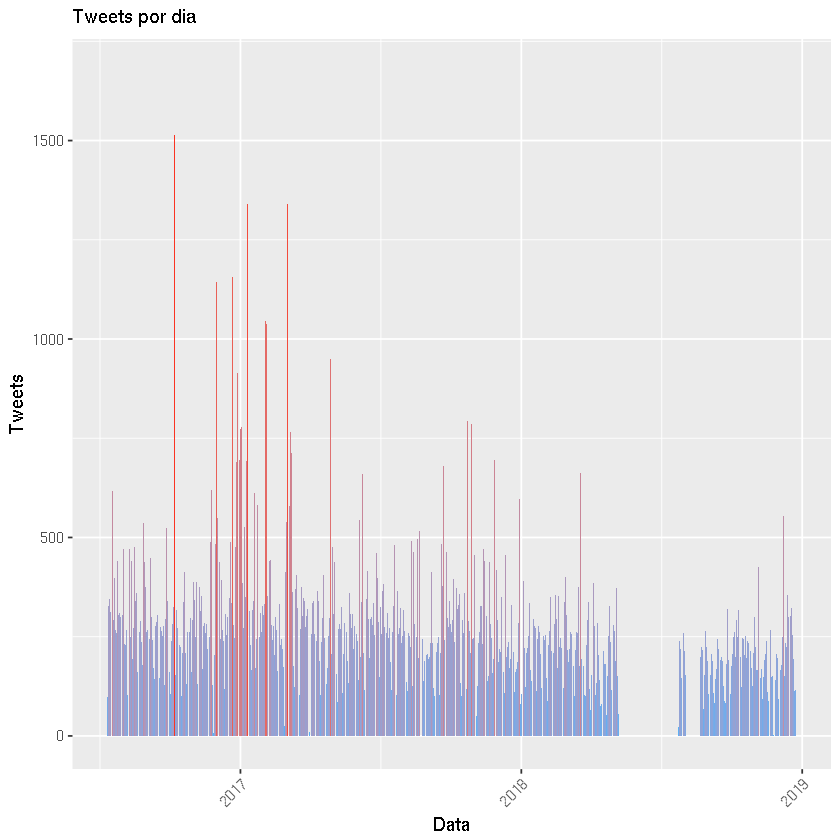

In [20]:
ggplot(data = twsDia, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por dia")

# Tweets por mês

In [22]:
twsMes <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as datatweet, " ,
                          "count(t.codtweet) AS tweet " ,
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 132 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsMes, file = "data/twsMes.rds")

In [23]:
twsMes

datatweet,tweet
2016-07,6466
2016-08,9534
2016-09,7853
2016-10,9151
2016-11,8397
2016-12,14707
2017-01,15067
2017-02,8625
2017-03,11416
2017-04,8000


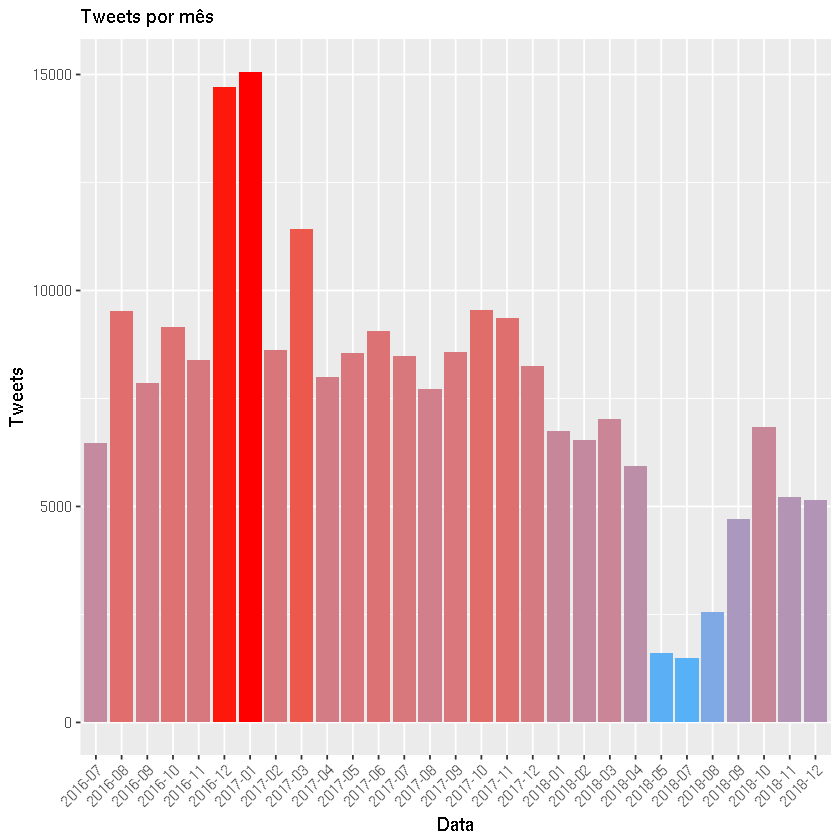

In [24]:
ggplot(data = twsMes, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por mês")

In [25]:
twsPais <- dbGetQuery(con, paste("SELECT " ,
                          "local1 as pais, " ,
                          "count(t.codtweet) AS tweet FROM tweet t " ,
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 132 and local1 <> '' ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsPais, file = "data/twsPais")
twsPais

pais,tweet
United States,995
United Kingdom,282
India,217
Canada,72
Australia,41
Kingdom of Saudi Arabia,27
United Arab Emirates,19
Republic of the Philippines,19
Costa Rica,18
Bahrain,16


In [ ]:
twsPais <- dbGetQuery(con, paste("SELECT " ,
                          "local1 as pais, " ,
                          "count(t.codtweet) AS tweet FROM tweet t " ,
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 132 and local1 <> '' ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsPais, file = "data/twsPais")
twsPais

In [15]:
twsIdiomas <- dbGetQuery(con, paste("SELECT " ,
                          "json->>'lang' as idioma, count(t.codtweet) as quantidade" ,
                          "from tweet t",
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 131 ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsIdiomas, file = "data/twsIdiomas")
twsIdiomas

idioma,quantidade
en,222603
ja,9866
und,5421
fr,1872
ca,1109
de,823
da,777
es,721
ro,562
tr,385
